### José Mário Queiroga Mafra
Uma aplicação interessante de Machine Learning em um dataset do mundo real.
Aprendi analisando estes dados, que nem sempre a utilização de todas as variáveis disponíveis é o melhor para implementação do modelo. Aprendi, também,trabalhar melhor com os algoritmos, bem como executar uma "EDA" rigorosa.


## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
import warnings
warnings.simplefilter("once")

#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet
#!pip install yellowbrick=="0.9.0" --quiet
#!pip install numpy=="1.16.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np
import matplotlib.pyplot as plt

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)


Usando pandas 1.3.4
Usando seaborn 0.11.2
Usando scipy 1.7.1
Usando yellowbrick 1.3.post1
Usando numpy 1.20.3


In [3]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [4]:
# solução
enem = pd.read_csv('../formacao-machine-learning-projeto_final/input/MICRODADOS_ENEM_2017.CSV',sep=';',
                   encoding='iso-8859-1',usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT",
                   "NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"])

In [5]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [6]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [7]:
# solução
todas_as_notas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT",
                   "NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]

In [8]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [9]:
# solução
enem.dropna(inplace=True)
enem['NU_NOTA_MT'].head()

0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [10]:
# solução e impressão
enem['nota_total'] = enem[todas_as_notas].sum(axis=1)
enem['nota_total'].head()

0   2681.400
3   2949.500
4   2786.700
5   2795.000
6   2858.500
Name: nota_total, dtype: float64

A média da nota total é: 2592.75
A mediana da nota total é: 2569.30
O desvio padrão da nota total é: 395.99


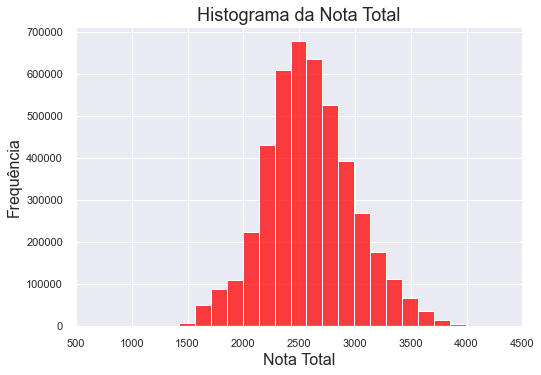

In [11]:
# solução histograma e descrição
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
sns.histplot(data=enem['nota_total'], bins=30, color='red')
plt.title('Histograma da Nota Total', fontsize=18)
plt.xlabel('Nota Total', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.xlim(500,4500)

# estatísticas
media_nt = enem['nota_total'].mean()
mediana_nt = enem['nota_total'].median()
desviopd_nt = enem['nota_total'].std()
print(f'A média da nota total é: {media_nt:.2f}')
print(f'A mediana da nota total é: {mediana_nt:.2f}')
print(f'O desvio padrão da nota total é: {desviopd_nt:.2f}')

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

<>:32: DeprecationWarning: invalid escape sequence \m


Enem EDA sampling tem a distribuição normal, semelhante à apopulação,com média
e mediana bastante próximas.

Descrição da nota_total:

count   44267.000
mean     2594.171
std       396.475
min         0.000
25%      2330.450
50%      2572.800
75%      2841.550
max      4198.900
Name: nota_total, dtype: float64


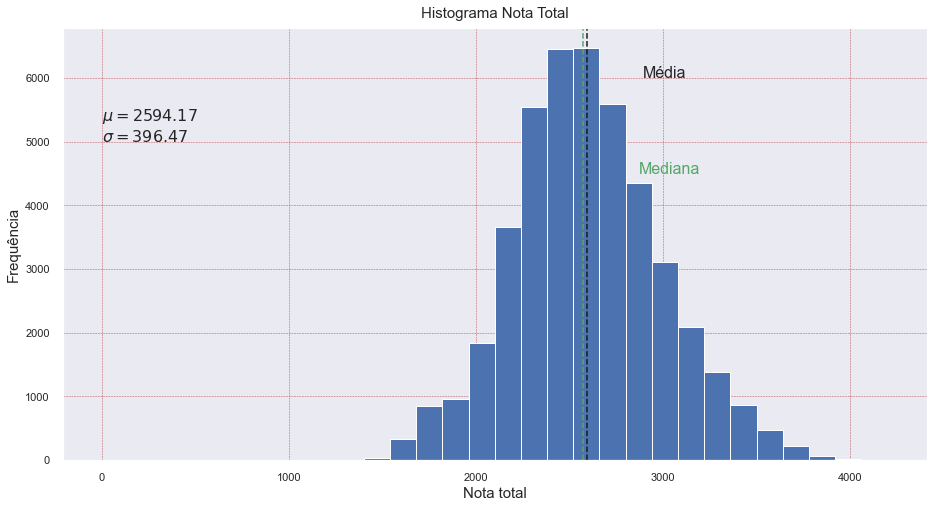

In [12]:
import matplotlib.pyplot as plt

# solução sua função de sampling

def eda_sample(enem):
    # seed
    SEED=745
    np.random.seed(SEED)
    
    # 1% de sample em enem_eda
    enem_eda = enem.sample(n=int(len(enem)*0.01), random_state=SEED)
    
    print('Enem EDA sampling tem a distribuição normal, semelhante à apopulação,com média\ne mediana bastante próximas.\n')
    print('Descrição da nota_total:\n')
    # descreva a nota_total
    print(enem_eda['nota_total'].describe())
    
    # plote o histograma da nota_total e mostre com plt.show()
    fig = plt.figure(figsize=(12,6))
    eixo = fig.add_axes([1,1,1,1])
    
    # Calculando a média e o desvio padrão
    mu, sigma = enem_eda['nota_total'].mean(), enem_eda['nota_total'].std()

    eixo.hist(enem_eda['nota_total'], bins=30)
    eixo.set_title('Histograma Nota Total', fontsize=15, pad=10)
    eixo.set_xlabel('Nota total', fontsize=15)
    eixo.set_ylabel('Frequência', fontsize=15)
    eixo.grid(ls='--',color='r', lw=0.5)

    # Escrevendo no gráfico
    eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu,sigma),
                 xy=(0,5000), fontsize=16)

    # Linha vertical na média
    eixo.axvline(mu, color='k', linestyle='--')
    eixo.annotate('Média', xy=(mu+300,6000), fontsize=16)

    #Linha vertical na mediana
    eixo.axvline(enem_eda['nota_total'].median(), color='g', linestyle='--')
    eixo.annotate('Mediana', xy=(enem_eda['nota_total'].median()+300,4500), fontsize=16, color ='g')

    plt.show()

    return enem_eda

enem_eda = eda_sample(enem)

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [13]:
# solução
todas_as_notas.append('nota_total')
print(todas_as_notas)
enem[todas_as_notas].head()
correlacoes = enem[todas_as_notas].corr()
correlacoes


['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'nota_total']


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.612,0.570,0.549,0.345,0.319,0.390,0.384,0.356,0.733
NU_NOTA_CH,0.612,1.000,0.708,0.570,0.398,0.359,0.436,0.427,0.394,0.794
NU_NOTA_LC,0.570,0.708,1.000,0.542,0.441,0.370,0.455,0.446,0.396,0.776
NU_NOTA_MT,0.549,0.570,0.542,1.000,0.357,0.325,0.394,0.391,0.353,0.760
NU_NOTA_COMP1,0.345,0.398,0.441,0.357,1.000,0.774,0.833,0.862,0.594,0.726
NU_NOTA_COMP2,0.319,0.359,0.370,0.325,0.774,1.000,0.859,0.796,0.631,0.693
NU_NOTA_COMP3,0.390,0.436,0.455,0.394,0.833,0.859,1.000,0.867,0.673,0.773
NU_NOTA_COMP4,0.384,0.427,0.446,0.391,0.862,0.796,0.867,1.000,0.653,0.761
NU_NOTA_COMP5,0.356,0.394,0.396,0.353,0.594,0.631,0.673,0.653,1.000,0.677
nota_total,0.733,0.794,0.776,0.760,0.726,0.693,0.773,0.761,0.677,1.000


In [14]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [15]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes.loc[['nota_total']]

In [16]:
#print(correlacao_com_nota_total)
correlacao_com_nota_total

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
nota_total,0.733,0.794,0.776,0.760,0.726,0.693,0.773,0.761,0.677,1.000


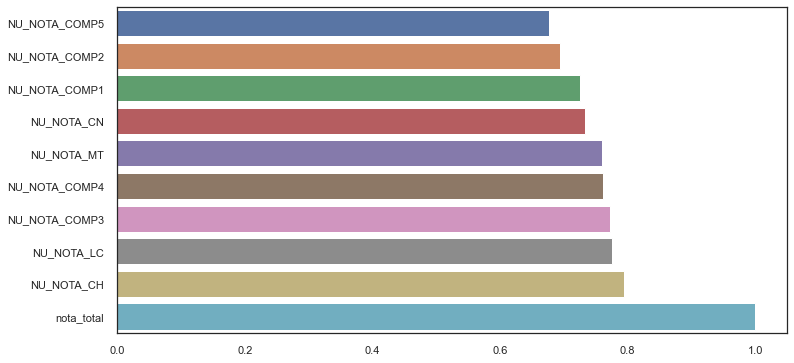

In [17]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = dados.corr()['nota_total'].sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(enem)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [18]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
interesse = enem_eda[['NU_NOTA_MT', 'NU_NOTA_LC', 'nota_total']]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
3066813,418.700,514.900,2471.600
249978,652.200,466.100,2807.900
2399891,532.700,539.900,2577.300
3959805,578.500,647.300,3198.700
5505273,374.900,419.900,2247.700


In [19]:
# Solução: a função de split

from sklearn.model_selection import train_test_split


def split(x,y):
    # seed
    SEED=42367
    np.random.seed(SEED)
    
    # train_test_split
    
    train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.33, random_state=SEED)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [20]:
# Código pronto
x = interesse[['NU_NOTA_MT','NU_NOTA_LC']]
y = interesse['nota_total']
train_x, test_x, train_y, test_y = split(x,y)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 2) (29658,) (14609, 2) (14609,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 398.3451354483895


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [22]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
   
    # crie o modelo, treine com os dados de treino
    model = LinearRegression()
    model.fit(train_x,train_y)
    # calcule o r2_score com os dados de teste
    # calcule a predição e os dois tipos de erros
    
    test_pred = model.predict(test_x)
    r2 = r2_score(test_y,test_pred)
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    
    
    print("*" * 80)
    print("r2 score", r2)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [23]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.7713437168397036
mse 36280.43175620675
mae 141.67462467453416


LinearRegression()

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

    Coloque sua opinião aqui
    
    mae = mean absolute error =  141.67
    desvio padrão dos estudantes do conjunto de testes = 398.35
    
    O erro absoluto médio é muito menor do que o desvio padrão (quase um terço menor). Assim, considero que o 
    modelo linear se ajusta bem.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


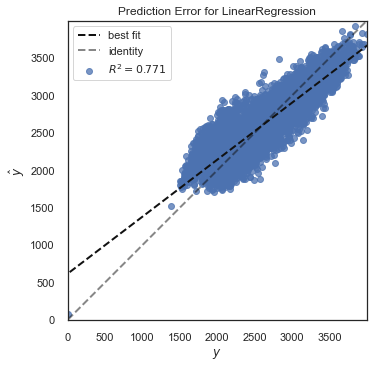

In [24]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


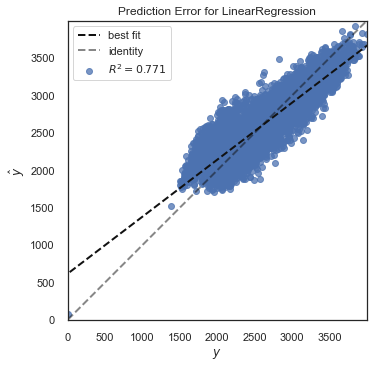

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


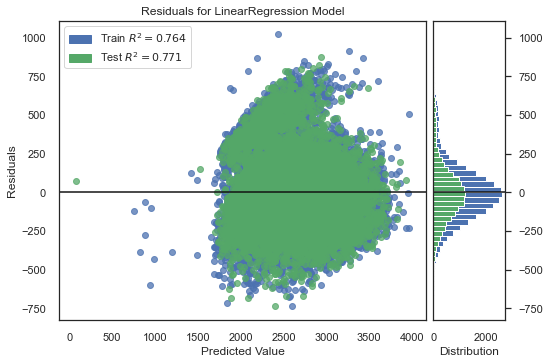

In [25]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [26]:
# variável interesse com todas as notas:
interesse = enem_eda[todas_as_notas]
interesse.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
3066813,565.000,493.000,514.900,418.700,120.000,120.000,100.000,80.000,60.000,2471.600
249978,560.300,509.300,466.100,652.200,120.000,120.000,120.000,140.000,120.000,2807.900
2399891,497.600,547.100,539.900,532.700,120.000,100.000,80.000,120.000,40.000,2577.300
3959805,600.600,632.300,647.300,578.500,160.000,120.000,140.000,160.000,160.000,3198.700
5505273,554.200,458.700,419.900,374.900,120.000,80.000,120.000,80.000,40.000,2247.700


In [27]:
# código pronto

def regressao_completa_para(x,y):
    #interesse = enem_eda[todas_as_notas]
    train_x, test_x, train_y, test_y = split(x,y)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)
    

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 9) (29658,) (14609, 9) (14609,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 1.0
mse 5.4429350611922e-25
mae 5.94293683559749e-13


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


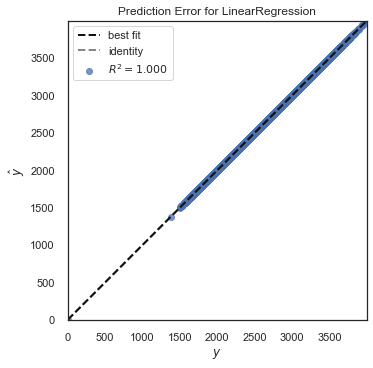

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


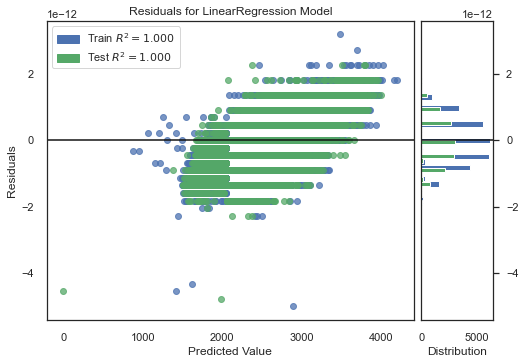

In [28]:
# solução 1: teste com todas as notas

# Com todas as notas o modelo não erra, pois nota_total é cominação de todas as nove notas.


SEED=42367
np.random.seed(SEED)

x = interesse[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT",
                   "NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]]
y = interesse['nota_total']

regressao_completa_para(x,y)


# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total



********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 8) (29658,) (14609, 8) (14609,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 0.9820867507067365
mse 2842.259174048429
mae 42.93295806148774


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


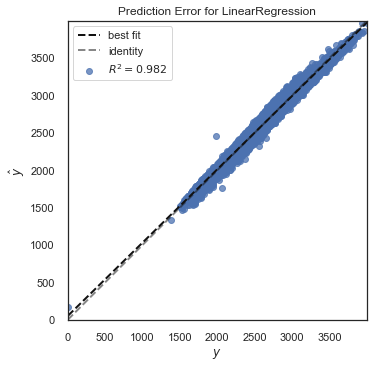

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


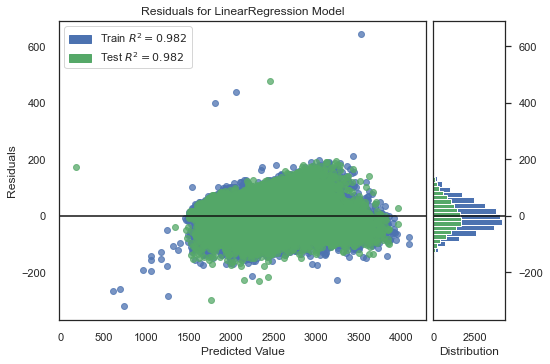

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 8) (29658,) (14609, 8) (14609,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 0.9829669979611856
mse 2702.5921156923596
mae 40.162603722732094


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


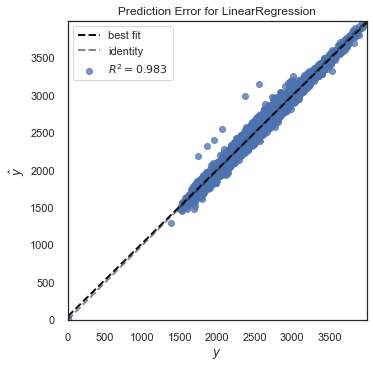

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


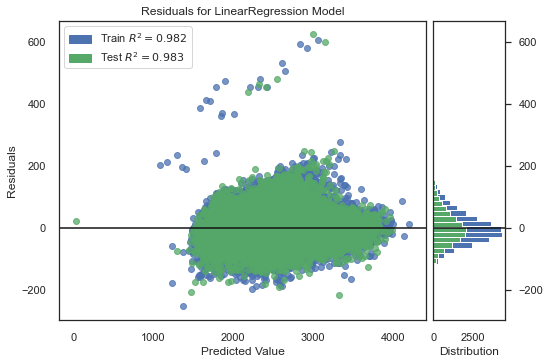

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 8) (29658,) (14609, 8) (14609,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 0.988499589995625
mse 1824.7468845613218
mae 32.82277073425535


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


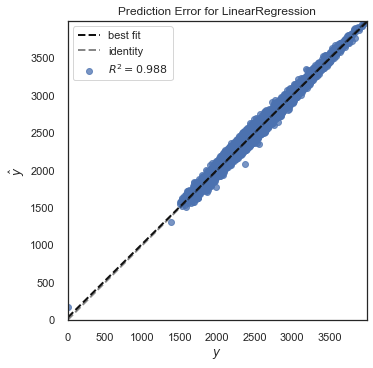

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


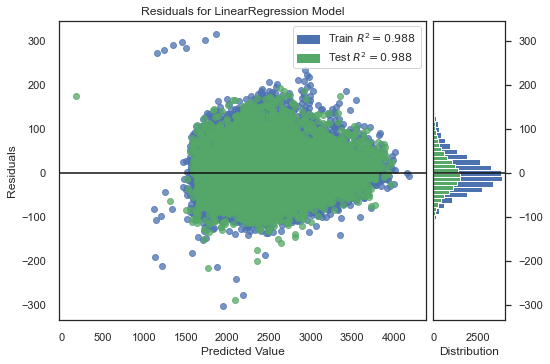

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 8) (29658,) (14609, 8) (14609,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 0.9592019063979472
mse 6473.351312524205
mae 64.50445473222815


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


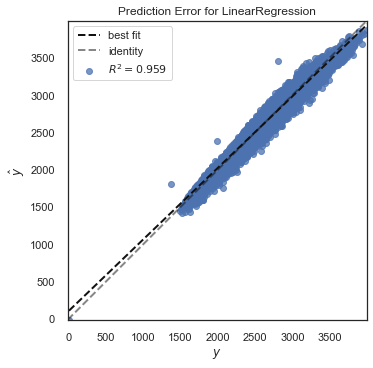

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


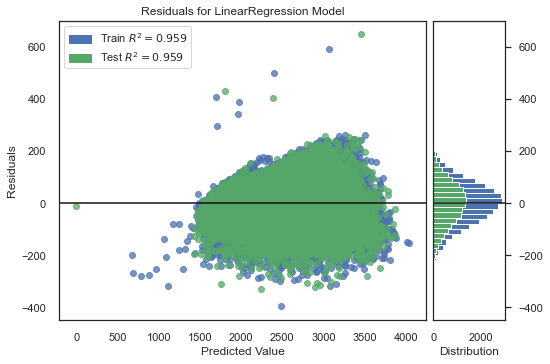

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 8) (29658,) (14609, 8) (14609,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 0.9979882316675518
mse 319.2032280325167
mae 14.381106593885267


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


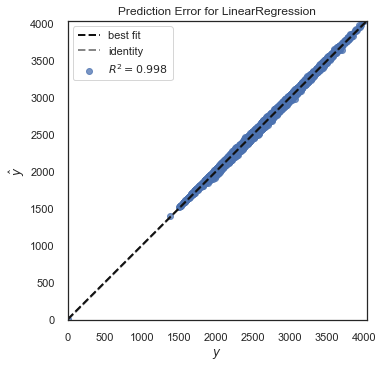

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


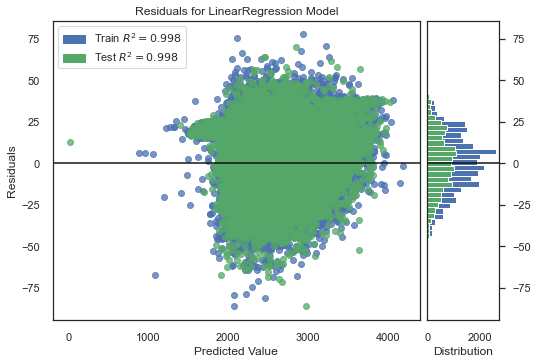

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 8) (29658,) (14609, 8) (14609,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 0.9976451066038982
mse 373.6461905598366
mae 15.035024230599495


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


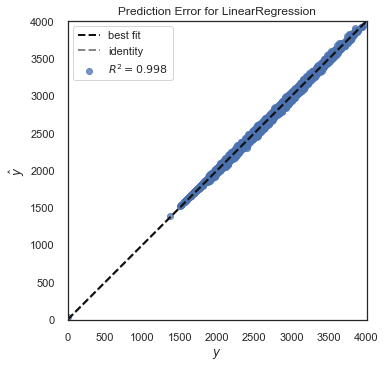

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


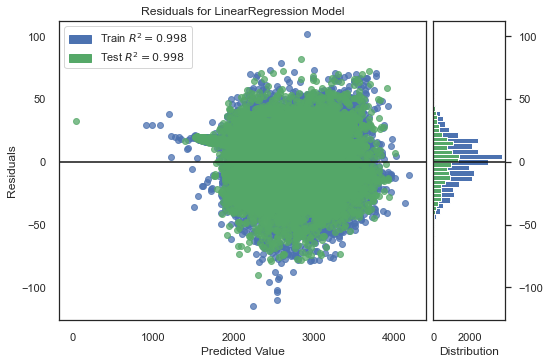

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 8) (29658,) (14609, 8) (14609,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 0.9984644740220701
mse 243.63881316620228
mae 12.113065310202959


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


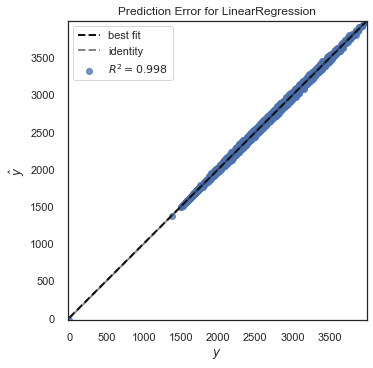

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


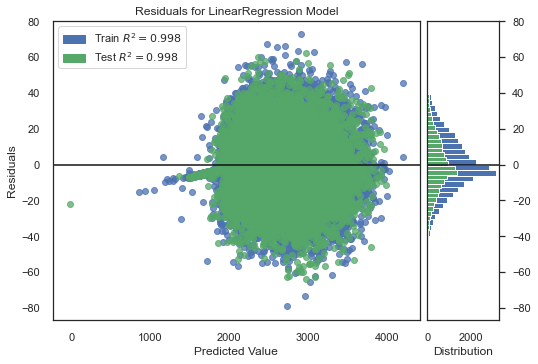

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 8) (29658,) (14609, 8) (14609,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 0.9982984488620068
mse 269.981690808743
mae 12.766680491765648


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


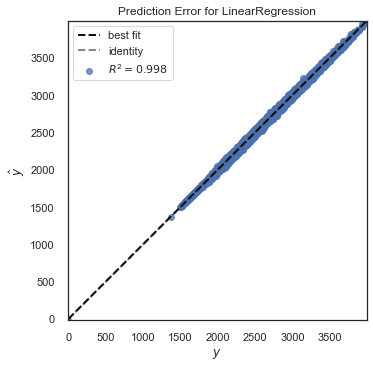

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


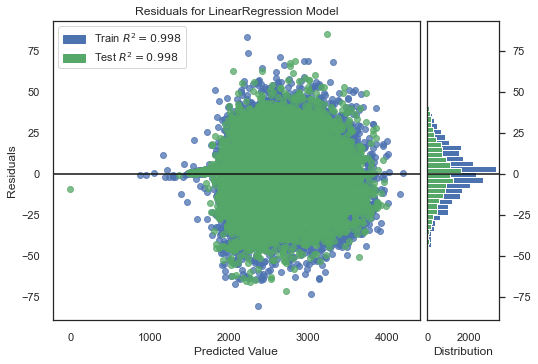

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 8) (29658,) (14609, 8) (14609,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 0.9929568674907755
mse 1117.5196448536055
mae 26.40848554886723


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


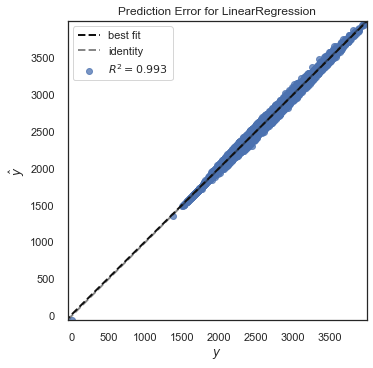

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


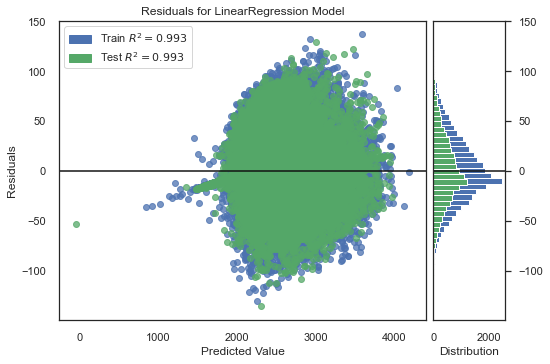

In [29]:
# solução 2: teste outra combinação
# Nesta combinação com 8 notas testamos a combinação de 8 notas com nota_total. Foi feito um "for" dentro da função
# para testar as combinações. Desta forma cumprimos os itens solicitados em solução 2 até solução 7. 
# O erro mínimo foi obtido foi:

# r2_score = 0.998 e mae = 12.77, utilizando a seguinte combinação de notas:
    
# ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
# 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP5']

SEED=42367
np.random.seed(SEED)

x = interesse[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT",
                   "NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]]
y = interesse['nota_total']

for column in x.columns:
    x_temp = x.drop(columns=column)
    
    regressao_completa_para(x_temp,y)



In [30]:
# solução 3: teste  com  outra combinação

# cumprida com o "for" na solução 2

In [31]:
# solução 4: teste outra combinação

# cumprida com o "for" na solução 2


In [32]:
# solução 5: teste outra combinação

# cumprida com o "for" na solução 2

In [33]:
# solução 6: teste outra combinação

# cumprida com o "for" na solução 2

In [34]:
# solução 7: teste outra combinação

# cumprida com o "for" na solução 2

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

In [35]:
# solução
interesse = enem_eda[['NU_NOTA_LC', 'NU_NOTA_COMP3', 'NU_NOTA_MT', 'nota_total']]
interesse.head()


,NU_NOTA_LC,NU_NOTA_COMP3,NU_NOTA_MT,nota_total
3066813,514.900,100.000,418.700,2471.600
249978,466.100,120.000,652.200,2807.900
2399891,539.900,80.000,532.700,2577.300
3959805,647.300,140.000,578.500,3198.700
5505273,419.900,120.000,374.900,2247.700


In [36]:
def regressao_completa_para(x,y):
    #interesse = enem_eda[todas_as_notas]
    train_x, test_x, train_y, test_y = split(x,y)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 3) (29658,) (14609, 3) (14609,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 398.3451354483895
********************************************************************************
r2 score 0.927087733289008
mse 11568.8424566232
mae 85.26711757180709


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


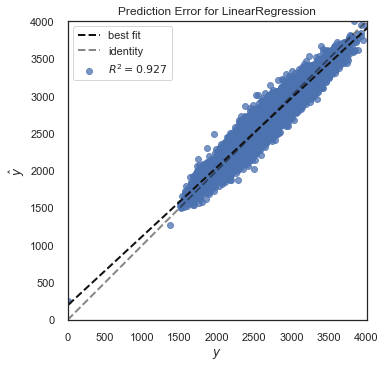

D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


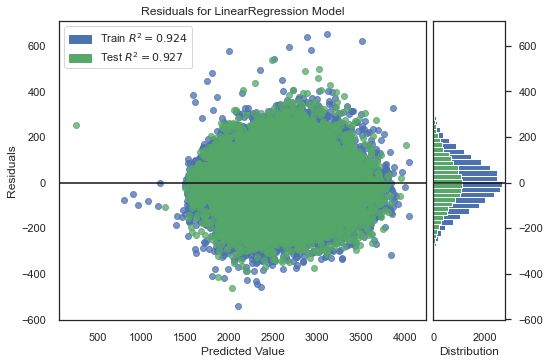

In [37]:
SEED=42367
np.random.seed(SEED)

x = interesse[['NU_NOTA_LC', 'NU_NOTA_COMP3', 'NU_NOTA_MT']]
y = interesse['nota_total']

regressao_completa_para(x,y)


## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [38]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
   
#def gera_regressores():
    # gere os modelos em uma lista
    #return modelos

In [39]:
# solução
from sklearn.metrics import r2_score

def gera_regressores(train_x, train_y):
    
    reg = LinearRegression()
    lasso = Lasso()
    ridge = Ridge()
    dtree = DecisionTreeRegressor()
    randfor = RandomForestRegressor()

    modelos = []
    modelos.append(reg.fit(train_x, train_y))
    modelos.append(lasso.fit(train_x, train_y))
    modelos.append(ridge.fit(train_x, train_y))
    modelos.append(dtree.fit(train_x, train_y))
    modelos.append(randfor.fit(train_x, train_y))
    
    return modelos
    
regressores = gera_regressores(train_x, train_y)

predicao = []
score = []
mse = []
mae = []

for i, regressor in enumerate(regressores):
    predicao.append(regressores[i].predict(test_x))
   
    score.append(r2_score(test_y, predicao[i]))
    mse.append(mean_squared_error(test_y, predicao[i]))
    mae.append(mean_absolute_error(test_y, predicao[i]))

#print('Regressão Linear:', 'R²:',score[0],' / MSE:',mse[0],' / MAE:',mae[0])
#print('Regressão Lasso:', 'R²:',score[1],' / MSE:',mse[1],' / MAE:',mae[1])
#print('Regressão Ridge:', 'R²:',score[2],' / MSE:',mse[2],' / MAE:',mae[2])
#print('Regressão DecisionTree:', 'R²:',score[3],' / MSE:',mse[3],' / MAE:',mae[3])
#print('Regressão RandomForest:', 'R²:',score[4],' / MSE:',mse[4],' / MAE:',mae[4])

# Preparando um dataframe para apresentação dos resultados

dados = {'Regressão': ['Linear', 'Lasso', 'Ridge', 'DecisonTree', 'RandomForest'],
      'Coef. Determ (R²)': [score[0],score[1],score[2],score[3],score[4]],
      'MSE':[mse[0],mse[1],mse[2],mse[3],mse[4]],
      'MAE':[mae[0],mae[1],mae[2],mae[3],mae[4]]} 
    
df= pd.DataFrame(dados)
df = df.set_index('Regressão')
df


,Coef. Determ (R²),MSE,MAE
Regressão,,,
Linear,0.771,36280.432,141.675
Lasso,0.771,36280.615,141.675
Ridge,0.771,36280.432,141.675
DecisonTree,0.534,73989.366,206.637
RandomForest,0.735,41996.134,154.863


In [40]:
# teste

if(len(regressores)!= 5):
    print("Erro!!! São 5 regressores que queremos testar!")

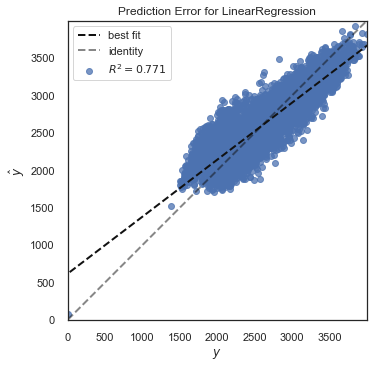

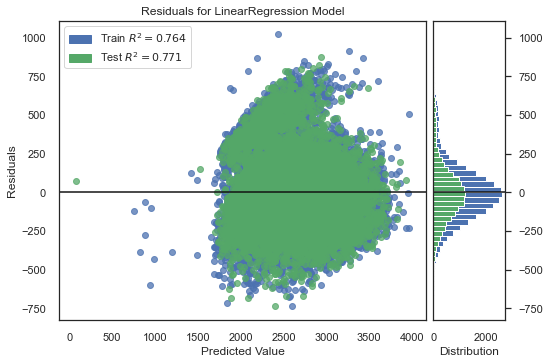

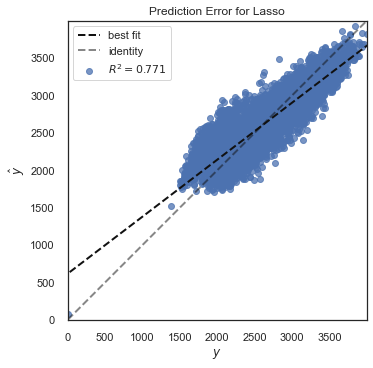

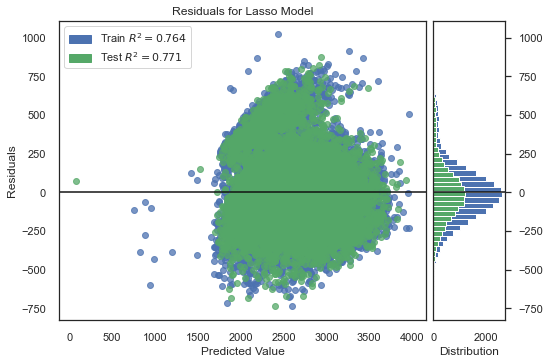

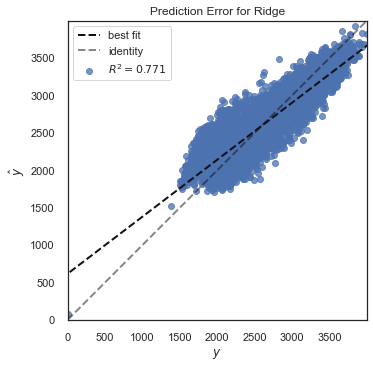

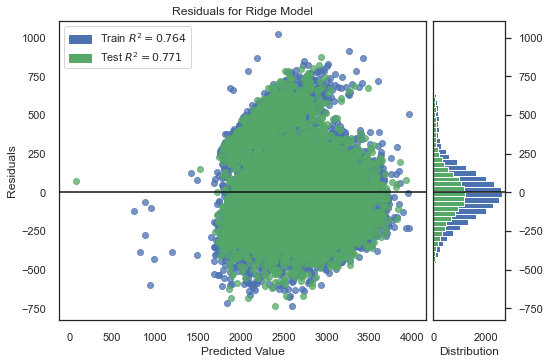

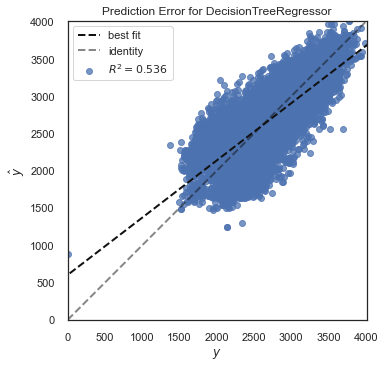

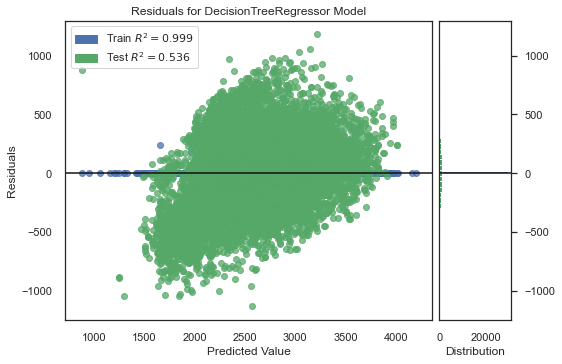

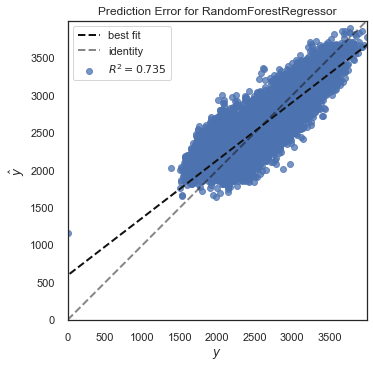

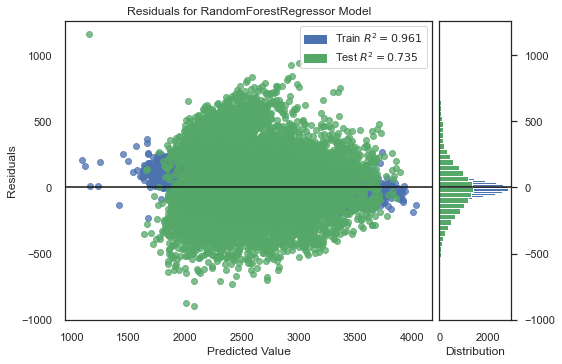

In [41]:
# aplicando visualiza_erros

#from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor import residuals_plot
def visualiza_erros(train_x,train_y,test_x,test_y):
    SEED=42367
    np.random.seed(SEED)
    
    reg = LinearRegression()
    lasso = Lasso()
    ridge = Ridge()
    dtree = DecisionTreeRegressor()
    randfor = RandomForestRegressor()
    
    regret = []
    regret.append(reg)
    regret.append(lasso)
    regret.append(ridge)
    regret.append(dtree)
    regret.append(randfor)

    return regret

visualiza = visualiza_erros(train_x, train_y, test_x,test_y)
   
predicao = []
error = []
residuo = []


for i, regressor in enumerate(visualiza):
    predicao.append(visualiza[i])

    error.append(PredictionError(predicao[i]))
    error[i].fit(train_x, train_y)
    error[i].score(test_x, test_y)
    error[i].show()
    
    residuo.append(ResidualsPlot(predicao[i]))
    residuo[i].fit(train_x, train_y)
    residuo[i].score(test_x, test_y)
    residuo[i].show()
    #poof_test.append(residuals_plot(predicao[i], train_x, train_y, test_x, test_y)

    #visualizer = PredictionError(regret[i])
    #visualizer.fit(train_x, train_y)
    #visualizer.score(test_x, test_y)
    #visualizer.poof()
    
    #visualizer = ResidualsPlot(regret[i])
    #visualizer.fit(train_x, train_y)
    #visualizer.score(test_x, test_y)
    #visualizer.poof()
    
   
    visualiza_erros(train_x,train_y,test_x,test_y)

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [42]:
enem_eda.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
3066813,565.000,493.000,514.900,418.700,120.000,120.000,100.000,80.000,60.000,2471.600
249978,560.300,509.300,466.100,652.200,120.000,120.000,120.000,140.000,120.000,2807.900
2399891,497.600,547.100,539.900,532.700,120.000,100.000,80.000,120.000,40.000,2577.300
3959805,600.600,632.300,647.300,578.500,160.000,120.000,140.000,160.000,160.000,3198.700
5505273,554.200,458.700,419.900,374.900,120.000,80.000,120.000,80.000,40.000,2247.700


<>:26: DeprecationWarning: invalid escape sequence \m


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 3) (29658, 1) (14609, 3) (14609, 1)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes nota_total   398.345
dtype: float64


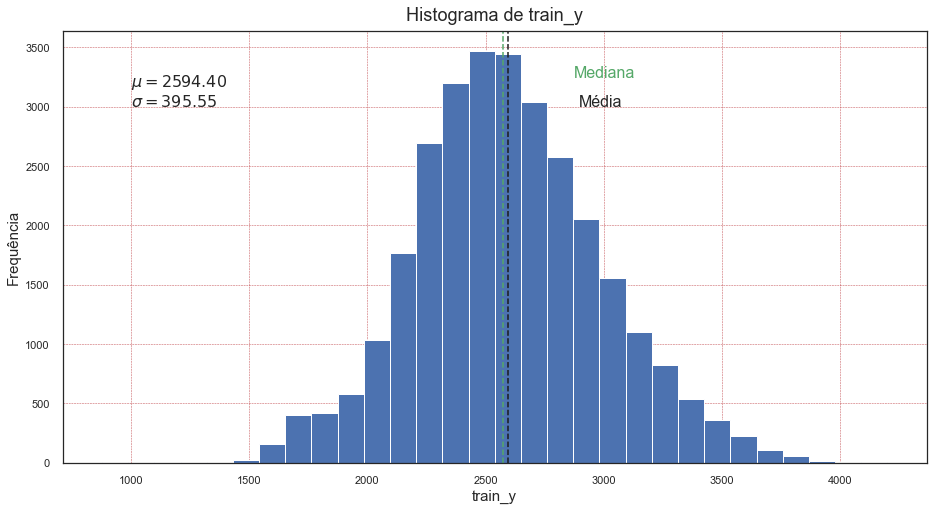

(         NU_NOTA_LC  NU_NOTA_COMP3  NU_NOTA_MT
 6192317     564.000        120.000     644.100
 2701675     521.200        120.000     539.300
 4365520     444.800         80.000     670.400
 295970      354.100        100.000     409.400
 6067145     566.800        120.000     545.400
 ...             ...            ...         ...
 4808038     516.900        120.000     642.100
 2710810     445.800         80.000     398.500
 1901524     483.100        160.000     585.300
 4431098     554.800        120.000     442.100
 3434190     455.900          0.000     366.200
 
 [29658 rows x 3 columns],
          NU_NOTA_LC  NU_NOTA_COMP3  NU_NOTA_MT
 4830206     513.500        120.000     666.600
 3244180     558.000        120.000     553.500
 1459545     467.200        120.000     371.300
 3661066     518.700        140.000     384.300
 747001      621.900        160.000     507.500
 ...             ...            ...         ...
 4783046     464.800        160.000     493.100
 235613    

In [43]:
# solução

def escolhe_dados(dados, colunas):
    # extraia as colunas
    dados=dados[colunas]
    # faça o split
    y = dados[['nota_total']]
    x = dados.drop('nota_total', axis=1)
    train_x,test_x,train_y, test_y = split(x,y)
    
    # plote o histograma de train_y
    
    fig = plt.figure(figsize=(12,6))
    eixo = fig.add_axes([1,1,1,1])
    
    # Calculando a média e o desvio padrão
    mu, sigma = np.array(train_y).mean(), np.array(train_y).std()

    eixo.hist(train_y, bins=30)
    eixo.set_title('Histograma de train_y', fontsize=18, pad=10)
    eixo.set_xlabel('train_y', fontsize=15)
    eixo.set_ylabel('Frequência', fontsize=15)
    eixo.grid(ls='--',color='r', lw=0.5)

    # Escrevendo no gráfico
    eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu,sigma), xy=(1000,3000), fontsize=16)

    # Linha vertical na média
    eixo.axvline(mu, color='k', linestyle='--')
    eixo.annotate('Média', xy=(mu+300, 3000), fontsize=16)

    #Linha vertical na mediana
    eixo.axvline(np.median(train_y), color='g', linestyle='--')
    # Calculando a média e o desvio padrão
    eixo.annotate('Mediana', xy=(np.median(train_y)+300,3250), fontsize=16, color ='g')

    plt.show()
    
    return train_x, test_x, train_y, test_y

escolhe_dados(enem_eda, colunas=['NU_NOTA_LC', 'NU_NOTA_COMP3', 'NU_NOTA_MT', 'nota_total'])

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [44]:
# solução:

import time
def treina_e_mede_regressor(modelos, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo
    modelos.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    test_pred = modelos.predict(test_x)
    # calcule o mse
    mse = mean_squared_error(test_y, test_pred)
    # calcule o mae
    mae = mean_absolute_error(test_y, test_pred)
    print("Resultado", modelos, mse, mae)

    return mse, mae, tempo_de_treino

In [45]:
# código pronto

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelos in gera_regressores(train_x,train_y):
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        # use o make_pipeline ou crie um Pipeline
        
        pipe = make_pipeline(StandardScaler(), modelos)
        
        #scaler = StandardScaler()
        #pipe = Pipeline([('escalador',scaler), ('modelo',modelo)])
        
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelos, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=['modelos', 'pipe', 'tempo_de_treino', 'mse', 'mae'])
    return test_x, test_y, resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 3) (29658, 1) (14609, 3) (14609, 1)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes nota_total   398.345
dtype: float64


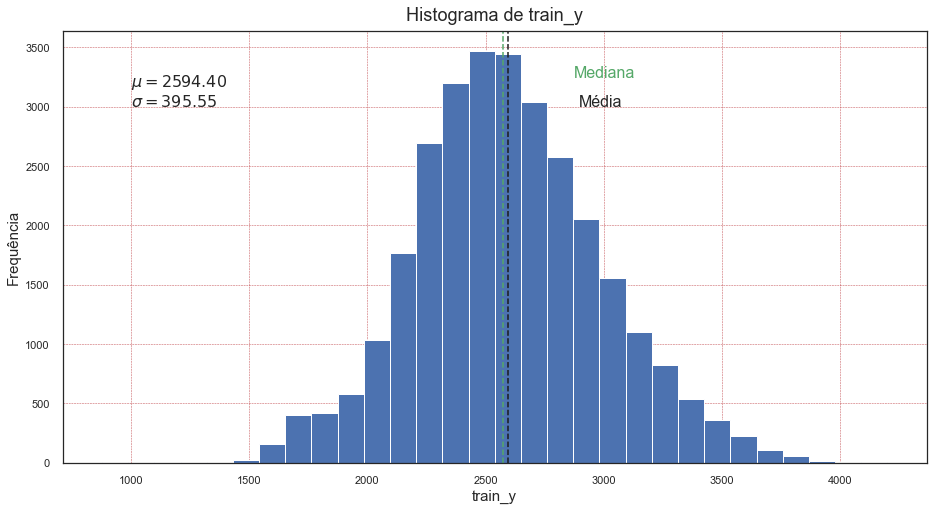

C:\Users\jqmaf\AppData\Local\Temp/ipykernel_11764/1132592186.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelos.append(randfor.fit(train_x, train_y))


Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]) 11568.842456623202 85.26711757180709
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())]) 11571.789264633653 85.32349621779674
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 11568.848011242902 85.26738318805
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())]) 22250.592695085223 117.82353686083921


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())]) 12861.378086328825 89.26548024097995


,modelos,mse,mae,tempo_de_treino
0,LinearRegression(),11568.842,85.267,0.006
1,Lasso(),11571.789,85.323,0.006
2,Ridge(),11568.848,85.267,0.005
3,DecisionTreeRegressor(),22250.593,117.824,0.104
4,"(DecisionTreeRegressor(max_features='auto', ra...",12861.378,89.265,5.699


In [46]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelos", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

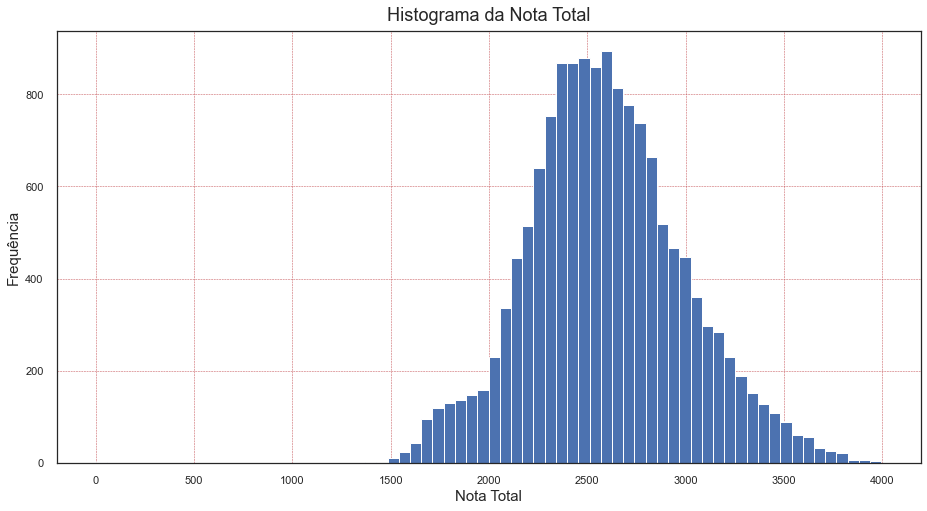

In [47]:
# solução: histograma
fig = plt.figure(figsize=(12,6))
eixo = fig.add_axes([1,1,1,1])

#eixo.hist(enem_eda['nota_total'], bins=50)
eixo.hist(test_y, bins=70)
eixo.set_title('Histograma da Nota Total', fontsize=18, pad=10)
eixo.set_xlabel('Nota Total', fontsize=15)
eixo.set_ylabel('Frequência', fontsize=15)
eixo.grid(ls='--',color='r', lw=0.5)



## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [93]:
def top_p(serie, p = 0.75):
    # calcule o quantil p
    quant = np.quantile(serie, q = p)
    print("quantile encontrado", quant)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y = pd.Series([1 if num > quant else 0 for num in serie])
    return y


In [94]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [95]:
# teste do top 10%
top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [112]:
# código pronto
# Observação: passando o código y_top25 = top_p(test_y) não funcionou. Tive que passar
# o test_y como enem_eda['nota_total']. Assim, funcionou adequadamente.

y_top25 = top_p(enem_eda['nota_total'])

y_top25.mean()



quantile encontrado 2841.55


0.2500056475478347

In [113]:
test_y

,nota_total
4830206,2829.700
3244180,2915.600
1459545,2361.000
3661066,2617.800
747001,3135.100
...,...
4783046,2846.100
235613,2899.300
1075373,2111.800
3013698,2370.400


D:\Anaconda\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


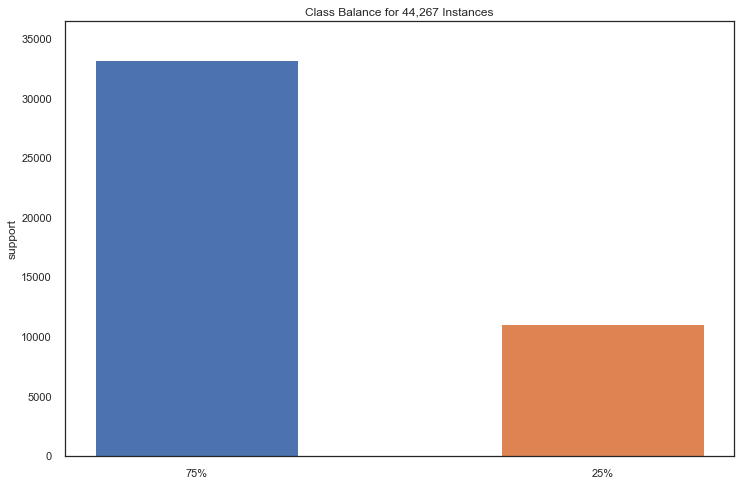

<AxesSubplot:title={'center':'Class Balance for 44,267 Instances'}, ylabel='support'>

In [114]:
# código pronto

from yellowbrick.target import ClassBalance

plt.figure(figsize = (12,8))
visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

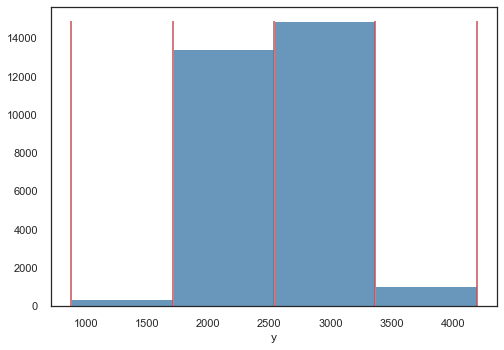

<AxesSubplot:xlabel='y'>

In [115]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [116]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [117]:
# solução

def gera_classificadores():
     
    # defina seus modelos
    modelos = [DummyClassifier(strategy='most_frequent'),
               LogisticRegression(), RidgeClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(n_estimators=10),
               SVC()]
    return modelos
          
  

In [118]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [119]:
def split_classificacao(dados):
    
    # faça o seed do numpy
    SEED=42367
    np.random.seed(SEED)
    
    # defina X como todas as colunas de `dados` exceto top_p
    #x = enem_eda.drop('nota_total', axis=1)
    x = dados.drop(columns='top_p')
    # defina y como somente a coluna top_p
    y = dados['top_p']
    # quebre em treino e teste, usando estratificação baseada em y
    train_x,test_x,train_y, test_y = train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.33,random_state=SEED, stratify=y)
   
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y
    


## Testando sua função de split

In [120]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = np.longdouble(top_p(interesse['nota_total']))
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 2841.55
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 3) (29658,) (14609, 3) (14609,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2499828872612773


C:\Users\jqmaf\AppData\Local\Temp/ipykernel_11764/3492467915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = np.longdouble(top_p(interesse['nota_total']))


## Pergunta: implemente o treino e o teste do classificador

In [121]:
# solução:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score as ac_score
from sklearn.model_selection import cross_validate
import time

def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
        
    #pipeline
    model = pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

   
    # calcule a accuracy_score
    accuracy_score = ac_score(test_y, model.predict(test_x))
    print("Resultado", nome, accuracy_score)

    return accuracy_score, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [122]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados[colunas] # selecione somente as colunas especificas de dados
    nota_total = dados['nota_total'] # somente a coluna nota_total
    interesse['top_p'] = np.longdouble(top_p(nota_total, p)) # defina quem está no top p

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2841.55
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 3) (29658,) (14609, 3) (14609,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2499828872612773


C:\Users\jqmaf\AppData\Local\Temp/ipykernel_11764/1747399046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = np.longdouble(top_p(nota_total, p)) # defina quem está no top p


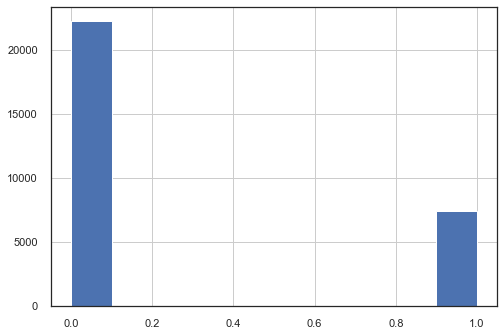

In [123]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [124]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2841.55
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 3) (29658,) (14609, 3) (14609,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2499828872612773


C:\Users\jqmaf\AppData\Local\Temp/ipykernel_11764/1747399046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = np.longdouble(top_p(nota_total, p)) # defina quem está no top p


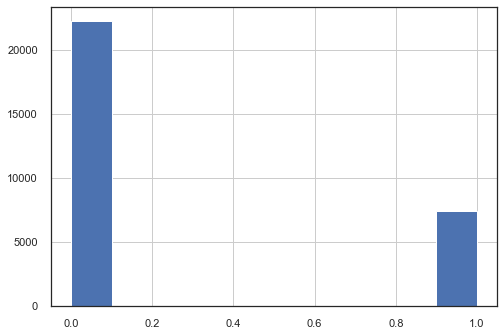

Resultado DummyClassifier 0.7500171127387227
Resultado LogisticRegression 0.9368882195906633
Resultado RidgeClassifier 0.9203915394619755
Resultado DecisionTreeClassifier 0.9077965637620645
Resultado RandomForestClassifier 0.9245670477103155
Resultado SVC 0.9370935724553358


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.006
LogisticRegression,0.937,0.138
RidgeClassifier,0.920,0.052
DecisionTreeClassifier,0.908,0.079
RandomForestClassifier,0.925,0.202
SVC,0.937,8.144


In [125]:
# solução top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.75)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2915.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 3) (29658,) (14609, 3) (14609,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.19994523923608734


C:\Users\jqmaf\AppData\Local\Temp/ipykernel_11764/1747399046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = np.longdouble(top_p(nota_total, p)) # defina quem está no top p


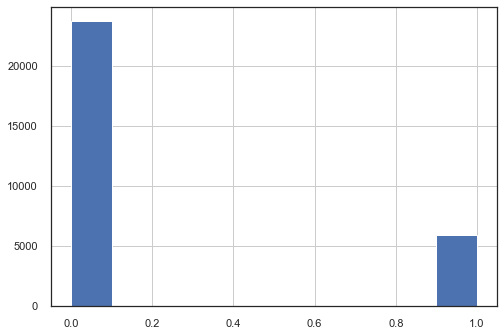

Resultado DummyClassifier 0.8000547607639127
Resultado LogisticRegression 0.9458552946813608
Resultado RidgeClassifier 0.9257307139434595
Resultado DecisionTreeClassifier 0.9201177356424122
Resultado RandomForestClassifier 0.9362721609966459
Resultado SVC 0.9458552946813608


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.800,0.008
LogisticRegression,0.946,0.035
RidgeClassifier,0.926,0.018
DecisionTreeClassifier,0.920,0.060
RandomForestClassifier,0.936,0.190
SVC,0.946,6.568


In [126]:
# solução top 20%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.8)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3119.0
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 3) (29658,) (14609, 3) (14609,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.09993839414059826


C:\Users\jqmaf\AppData\Local\Temp/ipykernel_11764/1747399046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = np.longdouble(top_p(nota_total, p)) # defina quem está no top p


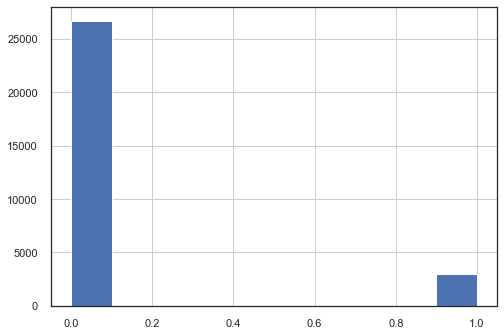

Resultado DummyClassifier 0.9000616058594018
Resultado LogisticRegression 0.9715928537203093
Resultado RidgeClassifier 0.925525361078787
Resultado DecisionTreeClassifier 0.9580395646519269
Resultado RandomForestClassifier 0.9669381887877336
Resultado SVC 0.9708398932165103


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.900,0.007
LogisticRegression,0.972,0.048
RidgeClassifier,0.926,0.020
DecisionTreeClassifier,0.958,0.056
RandomForestClassifier,0.967,0.178
SVC,0.971,3.803


In [127]:
# solução top 10%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.9)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3290.809999999999
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 3) (29658,) (14609, 3) (14609,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.05003764802518995


C:\Users\jqmaf\AppData\Local\Temp/ipykernel_11764/1747399046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = np.longdouble(top_p(nota_total, p)) # defina quem está no top p


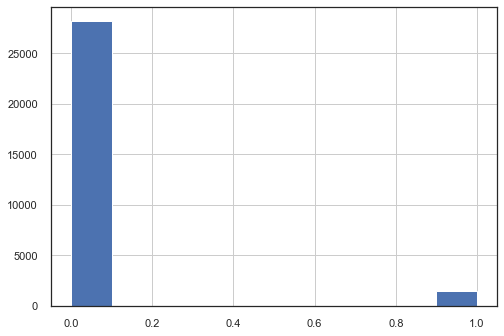

Resultado DummyClassifier 0.94996235197481
Resultado LogisticRegression 0.9794647135327538
Resultado RidgeClassifier 0.9500308029297009
Resultado DecisionTreeClassifier 0.9713190499007461
Resultado RandomForestClassifier 0.9765897734273393
Resultado SVC 0.9790540078034089


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.950,0.009
LogisticRegression,0.979,0.055
RidgeClassifier,0.950,0.014
DecisionTreeClassifier,0.971,0.042
RandomForestClassifier,0.977,0.164
SVC,0.979,2.110


In [128]:
# solução top 5%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.95)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3588.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (29658, 3) (29658,) (14609, 3) (14609,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.009993839414059826


C:\Users\jqmaf\AppData\Local\Temp/ipykernel_11764/1747399046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesse['top_p'] = np.longdouble(top_p(nota_total, p)) # defina quem está no top p


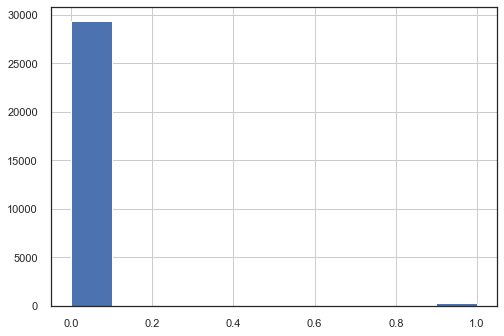

Resultado DummyClassifier 0.9900061605859402
Resultado LogisticRegression 0.9943185707440618
Resultado RidgeClassifier 0.9900061605859402
Resultado DecisionTreeClassifier 0.9923334930522281
Resultado RandomForestClassifier 0.9939763159696078
Resultado SVC 0.9943185707440618


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.990,0.007
LogisticRegression,0.994,0.062
RidgeClassifier,0.990,0.013
DecisionTreeClassifier,0.992,0.038
RandomForestClassifier,0.994,0.136
SVC,0.994,0.631


In [129]:
# solução top 1%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.99)
notas[["accuracy_score", "tempo_de_treino"]]

In [ ]:
# solução bottom 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, 0.25)
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

In [130]:
# código pronto: rodando para top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
notas[["accuracy_score", "tempo_de_treino"]]

,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.990,0.007
LogisticRegression,0.994,0.062
RidgeClassifier,0.990,0.013
DecisionTreeClassifier,0.992,0.038
RandomForestClassifier,0.994,0.136
SVC,0.994,0.631


## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [131]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9943185707440618


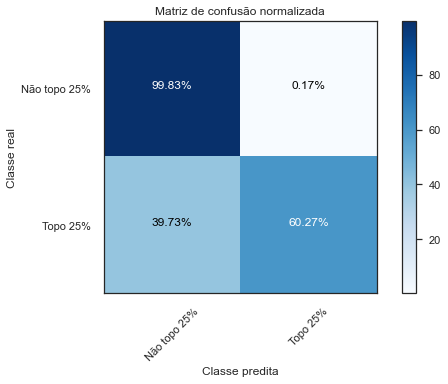

In [132]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9943185707440618


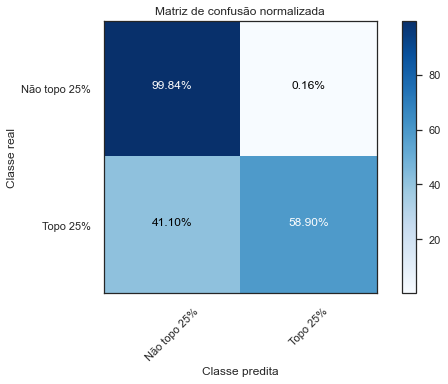

In [133]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [134]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382488 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [135]:
def separa_dados_de_classificacao_para_validacao(dados):
    # X = selecione as 3 colunas
    X = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
    #y = calcule o top 25% como 1 o bottom 75% como 0
    y = np.longdouble(top_p(dados['nota_total']))
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [136]:
# solução
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    
    X, y = separa_dados_de_classificacao_para_validacao(dados)
    cv = StratifiedKFold(n_splits=5)
    scores = cross_val_score(modelo, X, y, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1) # calcule o cross_val_score
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2839.5
Média da validação 0.2499269821160948


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.6s finished


Acurácia entre [93.49,93.49]
Acurácia do modelo em teste 0.9350232105598464


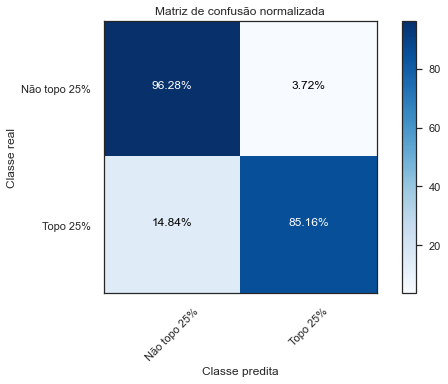

In [137]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [138]:
# solução: implemente o código que falta
# Esta foi a questão mais dificil de implementar os códigos. Consegui implementá-la através de perguntas 
# já respondidas no forum da Alura.

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        # some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha
        parcial = X.sum(axis=1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        # some por coluna
        parcial = X.sum(axis=1) 
        # compare a soma parcial com o self.top25_quantile
        y_pred_true_false = parcial.equals(self.top_25_quantile) 
        # 1 se for maior ou igual, 0 caso contrário
        y_pred = [1 if p else 0 for p in parcial > self.top_25_quantile]
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2839.5
Média da validação 0.2499269821160948


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


Acurácia entre [91.84,91.85]
top 25 quantile é 1247.90
Acurácia do modelo em teste 0.918468915374098


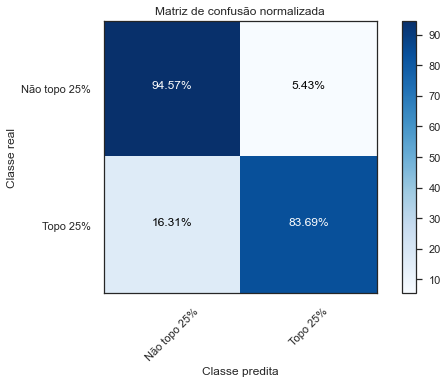

In [139]:

treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

Os resultados de heuristica final (0.92) e logistic regression (0,92) são iguais, enquanto que o dummy classifier é

da ordem de 0,75. 

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

Selecionar notas do Enem considerando a caracteristica da faculdade. Se for uma faculdade de ciências humanas, utilizar as notas de lingua portuguêsa, redação, geografia, história e afins.  Se for uma faculdade de ciências exatas, concentrar nas notas de matemática, ciênciad da natureza e  lingua portuguêsa.

    

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução
Vai selecionar alunos sem o conhecimento necessário. Tal fato poderá não atender aos resultados pretendidos pela faculdade.


## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!